# MNIST images classification with MLP

In this notebook, i will create a simple MNIST images classificator using MLP from Keras library.

In [37]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from keras import Sequential
from keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

<h3>Data Loading</h3>

In [25]:
(x_train, y_train), (x_test, y_test)=keras.datasets.fashion_mnist.load_data()

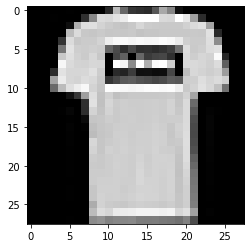

In [26]:
plt.imshow(x_train[1], cmap='gray', interpolation='none')

Image size

In [27]:
x_train[100].shape

(28, 28)

<h3>Model Creation</h3>

In [28]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28))
    Dense(160, activation='relu'),
    Dense(10, activation='softmax')
])

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 160)               125600    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1610      
Total params: 127,210
Trainable params: 127,210
Non-trainable params: 0
_________________________________________________________________


<h3>Model Compile</h3>

Defining the optimizer (Adam with learning rate 0.0001)

In [30]:
opt = keras.optimizers.Adam(learning_rate =  0.001)

In [31]:
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=15, batch_size=64, validation_split=0.2)

Epoch 1/15
750/750 [==============================] - 2s 3ms/step - loss: 17.2335 - accuracy: 0.6860 - val_loss: 1.0396 - val_accuracy: 0.7313
Epoch 2/15
750/750 [==============================] - 2s 3ms/step - loss: 0.8598 - accuracy: 0.7371 - val_loss: 0.7100 - val_accuracy: 0.7579
Epoch 3/15
750/750 [==============================] - 2s 3ms/step - loss: 0.6416 - accuracy: 0.7716 - val_loss: 0.6436 - val_accuracy: 0.7958
Epoch 4/15
750/750 [==============================] - 2s 3ms/step - loss: 0.5567 - accuracy: 0.8079 - val_loss: 0.5887 - val_accuracy: 0.8242
Epoch 5/15
750/750 [==============================] - 2s 3ms/step - loss: 0.5023 - accuracy: 0.8264 - val_loss: 0.5483 - val_accuracy: 0.8223
Epoch 6/15
750/750 [==============================] - 2s 3ms/step - loss: 0.4582 - accuracy: 0.8372 - val_loss: 0.5459 - val_accuracy: 0.8287
Epoch 7/15
750/750 [==============================] - 2s 3ms/step - loss: 0.4718 - accuracy: 0.8358 - val_loss: 0.5613 - val_accuracy: 0.8322
Epoch

<h3>Model Evaluation</h3>

In [32]:
results = model.evaluate(x_test, y_test, batch_size=64)

157/157 [==============================] - 0s 1ms/step - loss: 0.4849 - accuracy: 0.8427


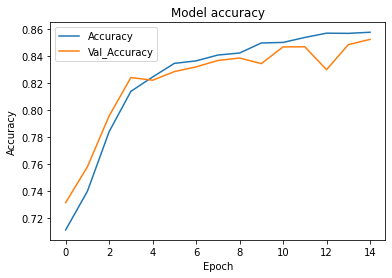

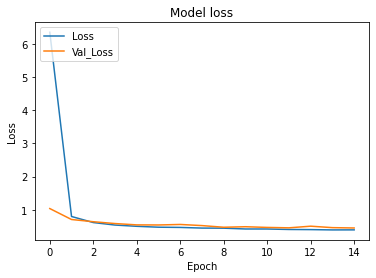

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Val_Accuracy'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Val_Loss'], loc='upper left')
plt.show()

<h3>New cases prediction</h3>

In [34]:
x_test[1:2].shape

(1, 28, 28)

In [35]:
pred = model.predict(x_test[1:2])

pred

array([[2.8572453e-04, 3.3016910e-12, 9.9819535e-01, 2.4409022e-05,
        5.8982638e-04, 3.3314464e-28, 9.0467691e-04, 0.0000000e+00,
        3.4580706e-12, 0.0000000e+00]], dtype=float32)

In [36]:
pred.shape

(1, 10)

In [40]:
np.argmax(pred, 1)

array([2])

In [38]:
y_test[1:2]

array([2], dtype=uint8)

In [39]:
y_test.shape

(10000,)

<h3>Insights</h3>

Checking the model evaluation section, i see that there is a little overfitting in this model, so, this model requires some regularization (maybe changing the number of neurons in the layers) to improve the performance. In the other hand, the model can predict new cases.